**Montamos la unidad de Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import pandas as pd , numpy as np

imdb = pd.read_csv('IMDB_prepro.csv')

**Calculamos las 10 palabras más frecuentes**

In [2]:
from collections import Counter
count = Counter()
for text in imdb['review'].values:
    for word in text.split():
        count[word]+=1
count.most_common(10)

[('movi', 98941),
 ('film', 92061),
 ('one', 52652),
 ('like', 43821),
 ('time', 29799),
 ('good', 28899),
 ('make', 28569),
 ('get', 27716),
 ('see', 27571),
 ('charact', 27568)]

**Hacemos el mismo cálculo pero por clase**

**Separamos las revisiones positivas y negativas**

In [3]:
rev_positive = imdb[imdb['sentiment']=='positive']
rev_positive.head()

,review,sentiment,word_count,new_word_count
0,one review mention watch 1 oz episod youll hoo...,positive,307,168
1,wonder littl product film techniqu unassum old...,positive,162,84
2,thought wonder way spend time hot summer weeke...,positive,166,86
4,petter mattei love time money visual stun film...,positive,230,125
5,probabl alltim favorit movi stori selfless sac...,positive,119,58


In [4]:
rev_negative = imdb[imdb['sentiment']=='negative']
rev_negative.head()

,review,sentiment,word_count,new_word_count
3,basic there famili littl boy jake think there ...,negative,138,67
7,show amaz fresh innov idea 70 first air first ...,negative,174,83
8,encourag posit comment film look forward watch...,negative,130,64
10,phil alien one quirki film humour base around ...,negative,96,51
11,saw movi 12 came recal scariest scene big bird...,negative,180,84


**Calculamos las 10 palabras más frecuentes de cada clase**

In [5]:
from collections import Counter
count = Counter()
for text in rev_positive['review'].values:
    for word in text.split():
        count[word]+=1
count.most_common(10)

[('film', 49001),
 ('movi', 43097),
 ('one', 26950),
 ('like', 19883),
 ('time', 15463),
 ('see', 14684),
 ('good', 14563),
 ('stori', 13644),
 ('charact', 13627),
 ('make', 13167)]

In [6]:
count = Counter()
for text in rev_negative['review'].values:
    for word in text.split():
        count[word]+=1
count.most_common(10)

[('movi', 55844),
 ('film', 43060),
 ('one', 25702),
 ('like', 23938),
 ('make', 15402),
 ('get', 15138),
 ('even', 15095),
 ('watch', 14572),
 ('time', 14336),
 ('good', 14336)]

**Representamos las muestras utilizando el modelo bag of words**

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
#Count vectorizer for bag of words
#cv=CountVectorizer(min_df=0,max_df=1,binary=False,max_features=None,ngram_range=(1, 3))
cv=CountVectorizer(min_df=0,max_df=1000000,binary=False,max_features=10,ngram_range=(1, 1))
#transformed train reviews
cv_imdb=cv.fit_transform(imdb['review'])

**Visualizamos la representación bag of words de las primeras 50 reviews**

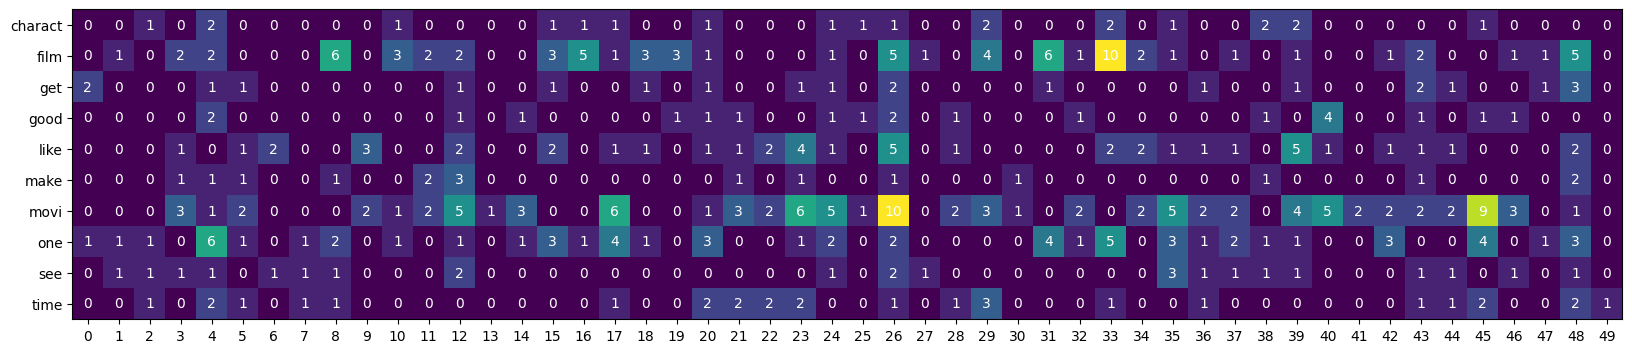

In [8]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,50)
bow=cv_imdb.toarray().transpose()
words=cv.get_feature_names_out()
_, ax = plt.subplots()
ax.set_yticks(np.arange(len(words)))
ax.set_yticklabels(words)
ax.set_xticks(np.arange(0,50,1))
ax.imshow(bow[:,0:50])
for i in range(len(words)):
    for j in range(50):
        text = ax.text(j, i, bow[i, j],
                       ha="center", va="center", color="w")
plt.show()

**Representamos las muestras utilizando la representación Term Frequency-Inverse Document Frequency model (TFIDF)**

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv=TfidfVectorizer(min_df=0,max_df=1000000,binary=False,max_features=10,ngram_range=(1, 1))
tv_imdb=tv.fit_transform(imdb['review'])

**Visualizamos la representación TFIDF de las primeras 50 reviews de las primeras 50 reviews**

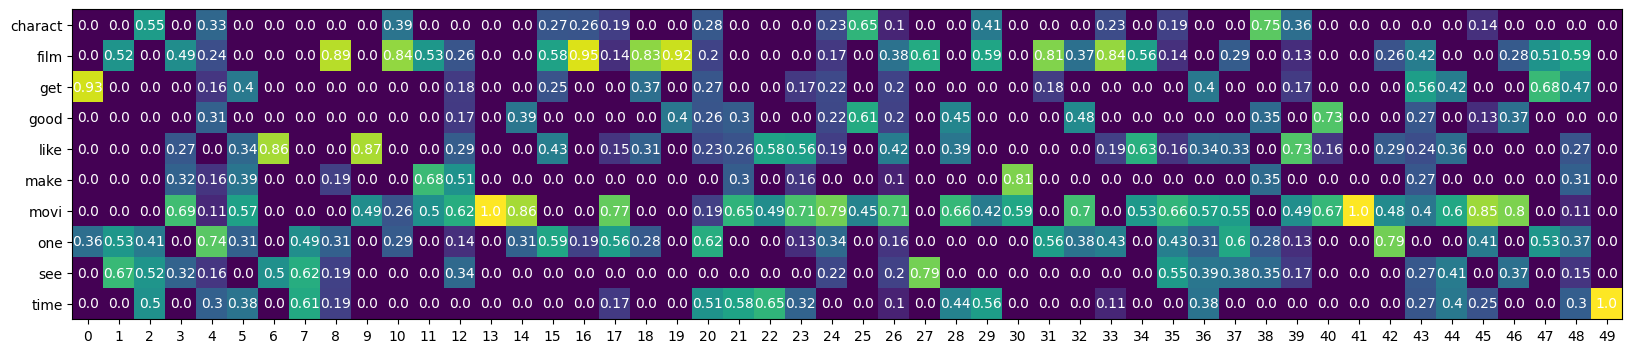

In [10]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,50)
tfidf=tv_imdb.toarray().transpose()
words=tv.get_feature_names_out()
_, ax = plt.subplots()
ax.set_yticks(np.arange(len(words)))
ax.set_yticklabels(words)
ax.set_xticks(np.arange(0,50,1))
ax.imshow(tfidf[:,0:50])
for i in range(len(words)):
    for j in range(50):
        text = ax.text(j, i, str(round(float(tfidf[i,j]), 2)),
                       ha="center", va="center", color="w")
plt.show()